In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_aps2012 = pd.read_csv("data/aps2012.csv", encoding = "latin1")
print (df_aps2012.shape)

(24803, 151)


In [3]:
## clear all values for '1'(male) in column 'sex' 
df_aps2012f = df_aps2012[df_aps2012.sex != 1]

In [4]:
print (df_aps2012f.shape)

(12814, 151)


### Mental Health Values:
    
1 - Excellent

2 - Very Good

3 - Good

4 - Fair

5 - Poor

In [5]:
df_aps2012f['mh_01g'].value_counts()

6    4087
2    2638
3    2452
1    2292
4     777
9     316
5     208
7      29
8      15
Name: mh_01g, dtype: int64

## Food Security and Mental Health

### Food Security - Food didn't last

#### ('fs_01')

1 - Often True
2 - Sometimes True
3 - Never True

In [6]:
df_aps2012_no_nan = df_aps2012f.copy()

## does "greater than include the number in the command or does it start
## from the next number

df_aps2012_no_nan["fs_01"][ df_aps2012_no_nan["fs_01"] >= 6 ] = np.nan

df_aps2012_no_nan["mh_01g"][ df_aps2012_no_nan["mh_01g"] >= 6] = np.nan

/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df_aps2012_no_nan['fs_01'].value_counts()

3.0    9497
2.0    2221
1.0     632
Name: fs_01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113bd52e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1099e4898>]], dtype=object)

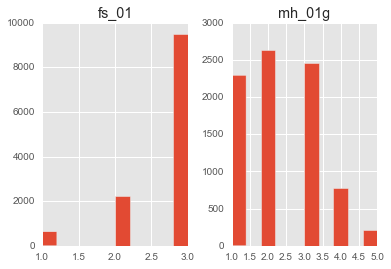

In [8]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_01']].hist()

In [9]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'])

In [10]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_01'], normalize = 'index')

In [11]:
x_tab

fs_01,1.0,2.0,3.0
mh_01g,,,
1.0,0.021529,0.114675,0.863796
2.0,0.038931,0.152290,0.808779
3.0,0.067216,0.253196,0.679588
4.0,0.125490,0.270588,0.603922
5.0,0.234146,0.273171,0.492683


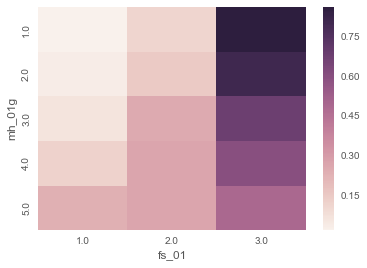

In [12]:
## generating heatmap. make sure to install seaborn to do this
sns.heatmap(x_tab)

### Pearson Correlation 

In [13]:
df_new = df_aps2012f
df_new = df_new[ df_new["fs_01"] < 6 ]
df_new = df_new[ df_new["mh_01g"] < 6 ]

In [14]:
from scipy.stats.stats import pearsonr

print(pearsonr(df_new['mh_01g'], df_new['fs_01']))

(-0.23744915995608729, 1.2851548889852822e-106)


### Food Security - Balanced Meals Unaffordable

#### ('fs_02')

1 - Often True

2 - Sometimes True

3 - Never True

In [24]:
df_aps2012_no_nan["fs_02"][ df_aps2012_no_nan["fs_02"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
df_aps2012_no_nan['fs_02'].value_counts()

3.0    9737
2.0    1936
1.0     663
Name: fs_02, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F1003BE48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E762FD0>]], dtype=object)

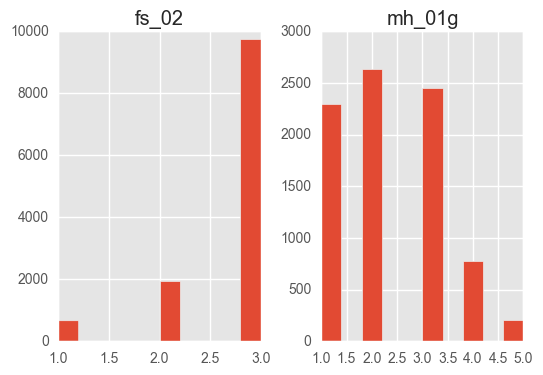

In [26]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_02']].hist()

In [30]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02'])

In [31]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_02'], normalize = 'all')

In [32]:
x_tab

fs_02,1.0,2.0,3.0
mh_01g,,,
1.0,0.007247,0.021621,0.246044
2.0,0.014132,0.040826,0.261384
3.0,0.019930,0.067279,0.204614
4.0,0.012441,0.022708,0.057133
5.0,0.005435,0.006885,0.012320


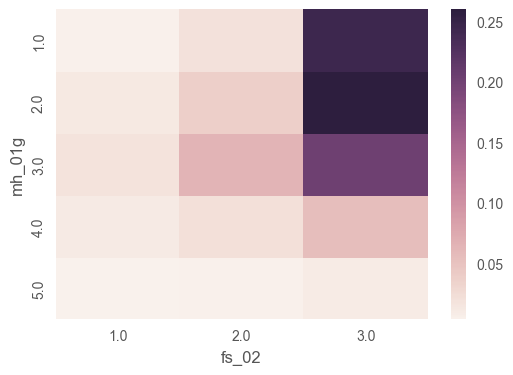

In [33]:
sns.heatmap(x_tab)

### Food Security - Meals skipped/cut meal size

#### ('fs_03')

1 - Yes

2 - No

In [35]:
df_aps2012_no_nan["fs_03"][ df_aps2012_no_nan["fs_03"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
df_aps2012_no_nan['fs_03'].value_counts()

2.0    10677
1.0     1670
Name: fs_03, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E7B18D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E92F438>]], dtype=object)

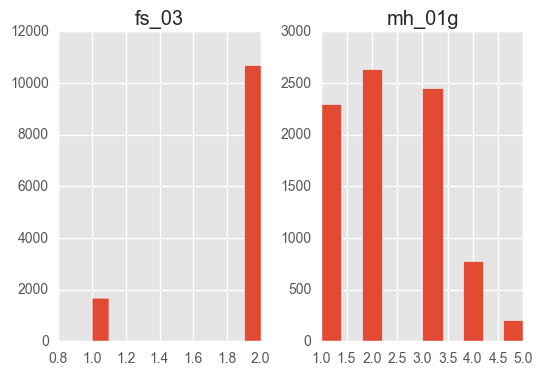

In [37]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_03']].hist()

In [38]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_03'])

In [39]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_03'], normalize = 'all')

In [40]:
x_tab

fs_03,1.0,2.0
mh_01g,,
1.0,0.017864,0.256608
2.0,0.029813,0.286421
3.0,0.056608,0.235607
4.0,0.027520,0.064816
5.0,0.010018,0.014725


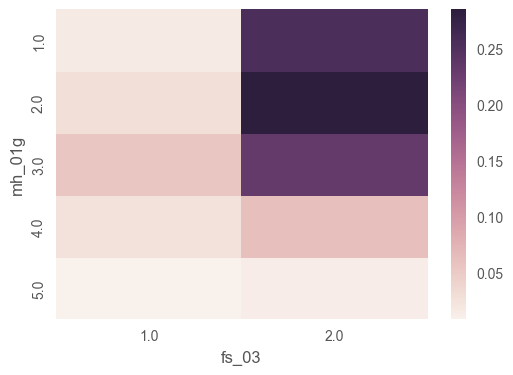

In [41]:
sns.heatmap(x_tab)

### Food Security - Ate less than you felt you should

#### ('fs_05')

1 - Yes

2 - No

In [42]:
df_aps2012_no_nan["fs_05"][ df_aps2012_no_nan["fs_05"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
df_aps2012_no_nan['fs_05'].value_counts()

2.0    10519
1.0     1826
Name: fs_05, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E947588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0EADB860>]], dtype=object)

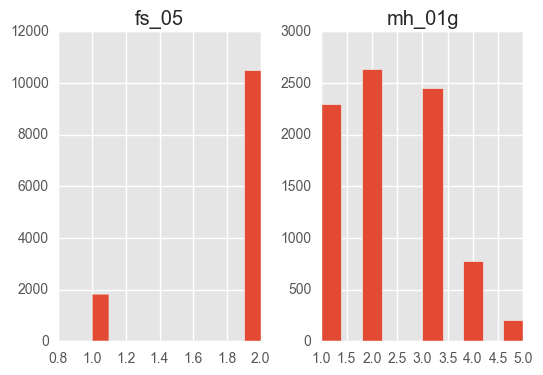

In [45]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_05']].hist()

In [46]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05'])

In [47]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_05'], normalize = 'all')

In [48]:
x_tab

fs_05,1.0,2.0
mh_01g,,
1.0,0.020275,0.254164
2.0,0.034757,0.281559
3.0,0.059377,0.232802
4.0,0.028120,0.064205
5.0,0.011224,0.013517


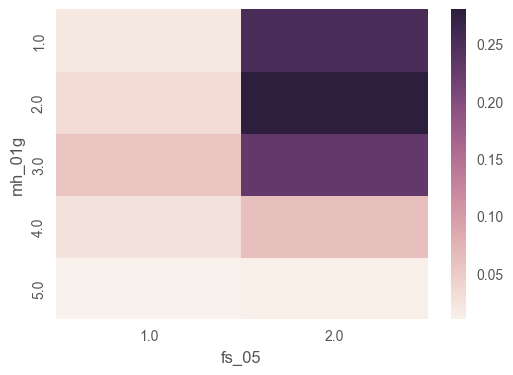

In [49]:
sns.heatmap(x_tab)

### Food Security - Hungry but could not afford food

#### ('fs_06')

1 - Yes

2 - No

In [50]:
df_aps2012_no_nan["fs_06"][ df_aps2012_no_nan["fs_06"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
df_aps2012_no_nan['fs_06'].value_counts()

2.0    11045
1.0     1294
Name: fs_06, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0EBFF358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0EC87BE0>]], dtype=object)

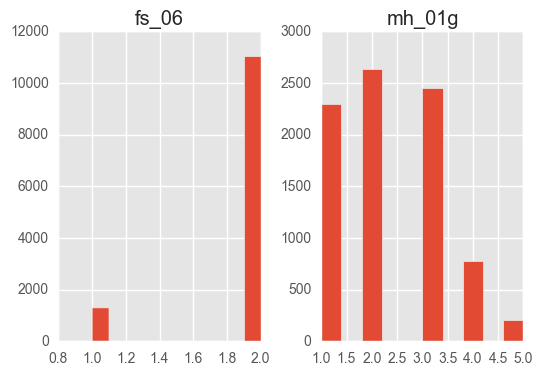

In [52]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'fs_06']].hist()

In [53]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_06'])

In [54]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['fs_06'], normalize = 'all')

In [55]:
x_tab

fs_06,1.0,2.0
mh_01g,,
1.0,0.012556,0.261982
2.0,0.022697,0.293734
3.0,0.043825,0.248099
4.0,0.022093,0.070385
5.0,0.009538,0.015091


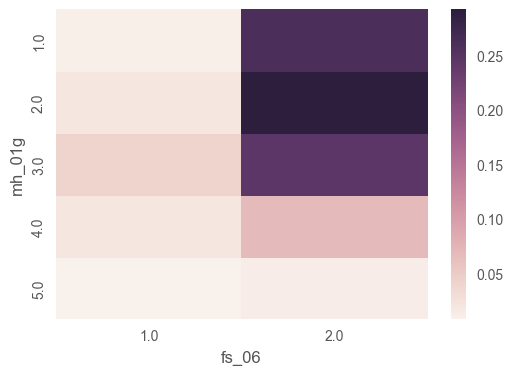

In [56]:
sns.heatmap(x_tab)

## Chronic Conditions and Mental Health

### High Blood Pressure

#### ('cc2_03a')

1 - Yes

2 - No

In [59]:
df_aps2012_no_nan["cc2_03a"][ df_aps2012_no_nan["cc2_03a"] >= 6 ] = np.nan

C:\Users\Sumaiyya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
df_aps2012_no_nan['cc2_03a'].value_counts()

2.0    9061
1.0    1215
Name: cc2_03a, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0EC92748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0ED79160>]], dtype=object)

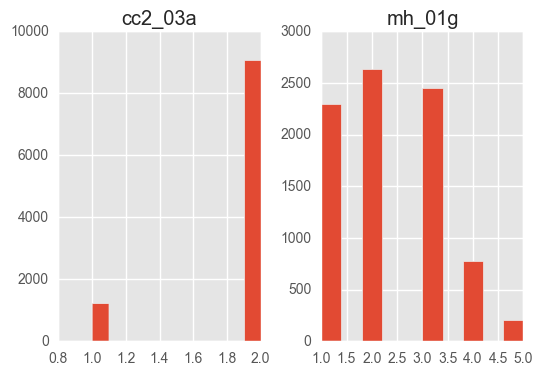

In [62]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

df_aps2012_no_nan[['mh_01g', 'cc2_03a']].hist()

In [63]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_03a'])

In [64]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_03a'], normalize = 'all')

In [65]:
x_tab

cc2_03a,1.0,2.0
mh_01g,,
1.0,0.030485,0.244359
2.0,0.039846,0.275444
3.0,0.043567,0.249520
4.0,0.017163,0.075612
5.0,0.006001,0.018003


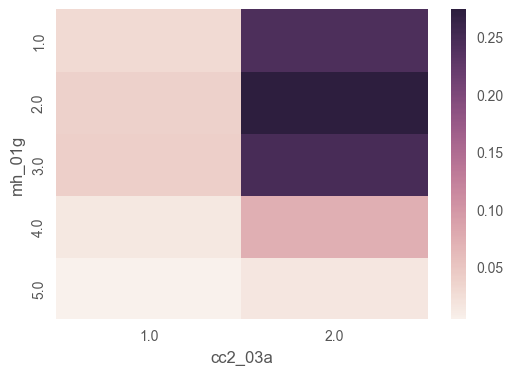

In [66]:
sns.heatmap(x_tab)

In [67]:
df_aps2012_no_nan = df_aps2012_no_nan[ df_aps2012_no_nan["cc2_03a"] < 6]

### Mood Disorder

#### ('cc2_09')

1 - Yes

2 - No

In [71]:
df_aps2012_no_nan["cc2_09"][ df_aps2012_no_nan["cc2_09"] >= 6 ] = np.nan

In [72]:
df_aps2012_no_nan['cc2_09'].value_counts()

2.0    8881
1.0    1360
Name: cc2_09, dtype: int64

In [73]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_09'])

In [74]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_09'], normalize = 'all')

In [75]:
x_tab

cc2_09,1.0,2.0
mh_01g,,
1.0,0.004449,0.270771
2.0,0.023446,0.292293
3.0,0.055669,0.237225
4.0,0.045930,0.046291
5.0,0.017795,0.006132


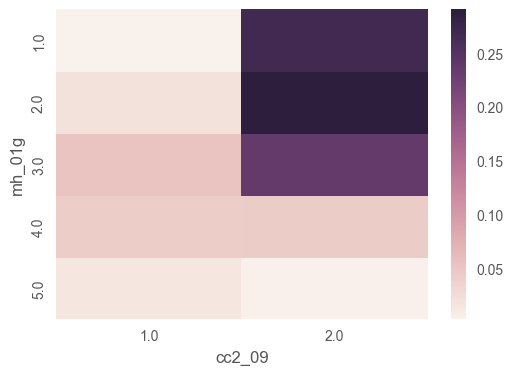

In [76]:
sns.heatmap(x_tab)

### Anxiety Disorder

#### ('cc2_10')

1 - Yes

2 - No

In [78]:
df_aps2012_no_nan["cc2_10"][ df_aps2012_no_nan["cc2_10"] >= 6 ] = np.nan

In [79]:
df_aps2012_no_nan['cc2_10'].value_counts()

2.0    8858
1.0    1390
Name: cc2_10, dtype: int64

In [80]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_10'])

In [81]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['cc2_10'], normalize = 'all')

In [82]:
x_tab

cc2_10,1.0,2.0
mh_01g,,
1.0,0.010453,0.264688
2.0,0.031839,0.283552
3.0,0.055028,0.237895
4.0,0.037366,0.055269
5.0,0.013337,0.010573


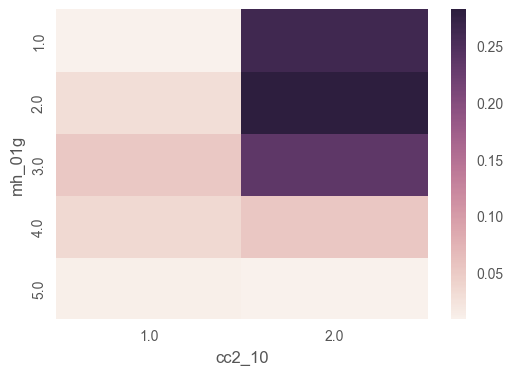

In [83]:
sns.heatmap(x_tab)

## General Health Indicators and Mental Health

### Health Status - Self-perceived

#### ('gh1_01')

1 - Excellent

2 - Very good

3 - Good

4 - Fair

5 - Poor

In [97]:
df_aps2012_no_nan["gh1_01"][ df_aps2012_no_nan["gh1_01"] >= 6 ] = np.nan

In [ ]:
df_aps2012_no_nan['gh1_01'].value_counts()

In [98]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh1_01'])

In [100]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['gh1_01'], normalize = 'all')

In [101]:
x_tab

gh1_01,1.0,2.0,3.0,4.0,5.0
mh_01g,,,,,
1.0,0.118516,0.088377,0.047190,0.015490,0.005283
2.0,0.044909,0.144813,0.087536,0.027378,0.010687
3.0,0.022454,0.062200,0.143492,0.045029,0.019813
4.0,0.002882,0.009126,0.030980,0.035663,0.014169
5.0,0.000600,0.001201,0.003602,0.005644,0.012968


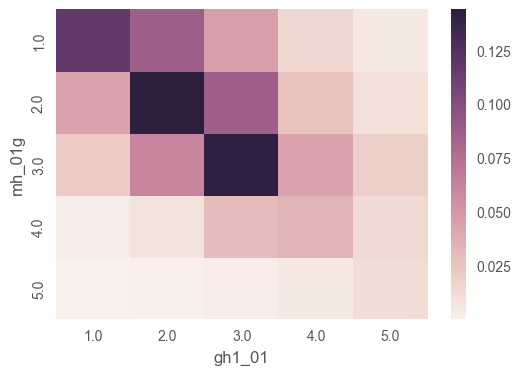

In [102]:
sns.heatmap(x_tab)

### Person to Turn to for support

#### ('dcommsup')

1 - No one

2 - Family only

3 - Non-relative only

4 - Both family and non-relative

In [90]:
df_aps2012_no_nan["dcommsup"][ df_aps2012_no_nan["dcommsup"] >= 6 ] = np.nan

In [92]:
df_aps2012_no_nan['dcommsup'].value_counts()

2.0    7048
4.0    2179
3.0     702
1.0     247
Name: dcommsup, dtype: int64

In [93]:
## generating cross tabs with absolute values
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dcommsup'])

In [94]:
## generating cross tabs with percentages
x_tab = pd.crosstab(df_aps2012_no_nan['mh_01g'], df_aps2012_no_nan['dcommsup'], normalize = 'all')

In [95]:
x_tab

dcommsup,1.0,2.0,3.0,4.0
mh_01g,,,,
1.0,0.006048,0.193662,0.013911,0.060965
2.0,0.005201,0.220515,0.021652,0.068828
3.0,0.010887,0.197653,0.025523,0.058304
4.0,0.004113,0.060360,0.011491,0.016935
5.0,0.001814,0.013669,0.004113,0.004355


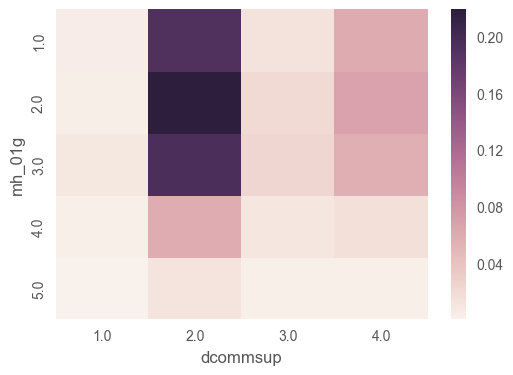

In [96]:
sns.heatmap(x_tab)

In [ ]:
## Traditional Activities and Mental Health